In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('/content/drive/MyDrive/E-commerce Customer Behavior - Sheet1.csv')

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df['Total Spend Per Item']=df['Total Spend']/df['Items Purchased']

In [6]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Total Spend Per Item
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571,65.228958
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813,8.997629
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000,49.525000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000,57.366667
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000,67.030000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000,73.025000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000,83.592857


In [7]:
# data cleaning
df=df.dropna()

In [8]:
df_numeric=df[['Age','Total Spend','Items Purchased','Average Rating','Days Since Last Purchase','Total Spend Per Item']]

In [9]:
df_numeric.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Total Spend Per Item
0,29,1120.20,14,4.6,25,80.014286
1,34,780.50,11,4.1,18,70.954545
2,43,510.75,9,3.4,42,56.750000
3,30,1480.30,19,4.7,12,77.910526
4,27,720.40,13,4.0,55,55.415385


In [10]:
categorical_data=['Gender','Membership Type','City','Satisfaction Level']
for x in categorical_data:
  print(df[x].value_counts())

Male      175
Female    173
Name: Gender, dtype: int64
Gold      117
Silver    117
Bronze    114
Name: Membership Type, dtype: int64
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          56
Name: City, dtype: int64
Satisfied      125
Unsatisfied    116
Neutral        107
Name: Satisfaction Level, dtype: int64


In [11]:
# classify average rating into 3.0-3.4, 3.5-3.9, 4.0-4.4, 4.5-4.9
avg_rating_group=['3.0-3.4', '3.5-3.9', '4.0-4.4', '4.5-4.9']
age_group=['25-29','30-34','35-39','40-44']
df['Avg_rating_group']=pd.cut(df['Average Rating'], bins=[2.9,3.4,3.9,4.4,4.9],labels=avg_rating_group)
df['Age_group']=pd.cut(df['Age'], bins=[24,29,34,39,44],labels=age_group)


<ipython-input-11-5f567c1a82f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_rating_group']=pd.cut(df['Average Rating'], bins=[2.9,3.4,3.9,4.4,4.9],labels=avg_rating_group)
<ipython-input-11-5f567c1a82f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_group']=pd.cut(df['Age'], bins=[24,29,34,39,44],labels=age_group)


In [12]:
df['Avg_rating_group'].value_counts()

4.5-4.9    109
4.0-4.4     92
3.0-3.4     81
3.5-3.9     66
Name: Avg_rating_group, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               348 non-null    int64   
 1   Gender                    348 non-null    object  
 2   Age                       348 non-null    int64   
 3   City                      348 non-null    object  
 4   Membership Type           348 non-null    object  
 5   Total Spend               348 non-null    float64 
 6   Items Purchased           348 non-null    int64   
 7   Average Rating            348 non-null    float64 
 8   Discount Applied          348 non-null    bool    
 9   Days Since Last Purchase  348 non-null    int64   
 10  Satisfaction Level        348 non-null    object  
 11  Total Spend Per Item      348 non-null    float64 
 12  Avg_rating_group          348 non-null    category
 13  Age_group                 348 non-null    category

# 提升Satisfaction Level

In [14]:
categorical_data=['Gender','Membership Type','City','Avg_rating_group','Age_group','Discount Applied']
for x in categorical_data:
  contingency_table = pd.crosstab(df['Satisfaction Level'], df[x])
  print("Contingency Table:")
  print(contingency_table)

  chi2, p, dof, expected = chi2_contingency(contingency_table)
# Print results
  print("\nChi-squared test statistic:", chi2)
  print("P-value:", p)
  print("Degrees of freedom:", dof)
  print("Expected frequencies table:")
  print(expected)
  print('\n')


Contingency Table:
Gender              Female  Male
Satisfaction Level              
Neutral                 56    51
Satisfied               58    67
Unsatisfied             59    57

Chi-squared test statistic: 0.9046632461007731
P-value: 0.6361431750014872
Degrees of freedom: 2
Expected frequencies table:
[[53.19252874 53.80747126]
 [62.1408046  62.8591954 ]
 [57.66666667 58.33333333]]


Contingency Table:
Membership Type     Bronze  Gold  Silver
Satisfaction Level                      
Neutral                 56     0      51
Satisfied                0   117       8
Unsatisfied             58     0      58

Chi-squared test statistic: 315.80332049390194
P-value: 4.219963613064613e-67
Degrees of freedom: 4
Expected frequencies table:
[[35.05172414 35.97413793 35.97413793]
 [40.94827586 42.02586207 42.02586207]
 [38.         39.         39.        ]]


Contingency Table:
City                Chicago  Houston  Los Angeles  Miami  New York  \
Satisfaction Level                          

In [15]:
contingency_table = pd.crosstab(df['Age_group'], df['City'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
City       Chicago  Houston  Los Angeles  Miami  New York  San Francisco
Age_group                                                               
25-29            0        0            1     34         1             33
30-34            0        0           34     24        58             24
35-39            0       56           24      0         0              1
40-44           58        0            0      0         0              0


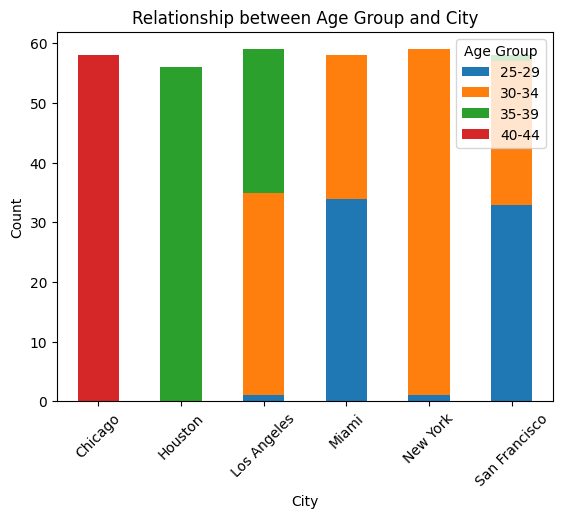

In [16]:
# Create a stacked bar plot
pd.crosstab( df['City'],df['Age_group']).plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Relationship between Age Group and City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Age Group', loc='upper right')
plt.xticks(rotation=45)
# Show the plot
plt.show()

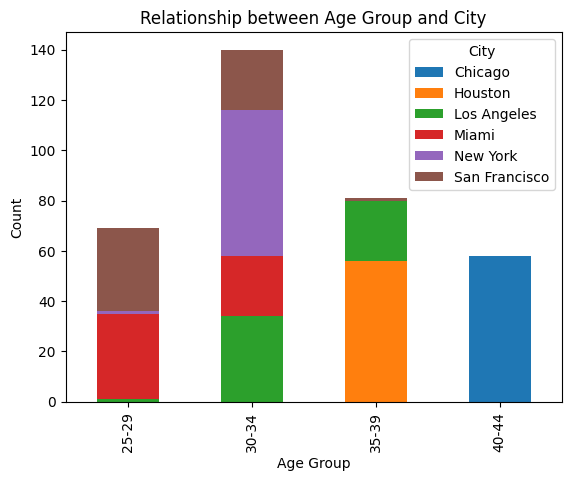

In [17]:
# Create a stacked bar plot
pd.crosstab(df['Age_group'],df['City']).plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Relationship between Age Group and City')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='City', loc='upper right')

# Show the plot
plt.show()

In [18]:
categorical_data_2=['Gender','Membership Type','City','Avg_rating_group','Age_group','Satisfaction Level']
for x in categorical_data_2:
  discount_relationship=df.groupby('Discount Applied')[x].value_counts()
  print(discount_relationship)

Discount Applied  Gender
False             Male      117
                  Female     56
True              Female    117
                  Male       58
Name: Gender, dtype: int64
Discount Applied  Membership Type
False             Silver             59
                  Gold               58
                  Bronze             56
True              Gold               59
                  Bronze             58
                  Silver             58
Name: Membership Type, dtype: int64
Discount Applied  City         
False             Los Angeles      59
                  San Francisco    58
                  Houston          56
True              New York         59
                  Chicago          58
                  Miami            58
Name: City, dtype: int64
Discount Applied  Avg_rating_group
False             4.0-4.4             59
                  4.5-4.9             58
                  3.0-3.4             56
                  3.5-3.9              0
True              3.5-3.9 

In [19]:
categorical_data_2=['Membership Type','City','Avg_rating_group','Age_group','Discount Applied']
for x in categorical_data_2:
  discount_relationship=df.groupby('Satisfaction Level')[x].value_counts()
  print(discount_relationship)

Satisfaction Level  Membership Type
Neutral             Bronze              56
                    Silver              51
Satisfied           Gold               117
                    Silver               8
Unsatisfied         Bronze              58
                    Silver              58
Name: Membership Type, dtype: int64
Satisfaction Level  City         
Neutral             Houston          56
                    Los Angeles      51
Satisfied           New York         59
                    San Francisco    58
                    Los Angeles       8
Unsatisfied         Chicago          58
                    Miami            58
Name: City, dtype: int64
Satisfaction Level  Avg_rating_group
Neutral             3.0-3.4              56
                    4.0-4.4              51
                    3.5-3.9               0
                    4.5-4.9               0
Satisfied           4.5-4.9             109
                    4.0-4.4              16
                    3.0-3.4   

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               348 non-null    int64   
 1   Gender                    348 non-null    object  
 2   Age                       348 non-null    int64   
 3   City                      348 non-null    object  
 4   Membership Type           348 non-null    object  
 5   Total Spend               348 non-null    float64 
 6   Items Purchased           348 non-null    int64   
 7   Average Rating            348 non-null    float64 
 8   Discount Applied          348 non-null    bool    
 9   Days Since Last Purchase  348 non-null    int64   
 10  Satisfaction Level        348 non-null    object  
 11  Total Spend Per Item      348 non-null    float64 
 12  Avg_rating_group          348 non-null    category
 13  Age_group                 348 non-null    category

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Random Forest for num + categorical

In [22]:
X=df[['Gender','Age','Average Rating','Days Since Last Purchase','Discount Applied','Items Purchased','Total Spend','Membership Type','City','Total Spend Per Item']]
y=df['Satisfaction Level']

# Define categorical and numerical features
categorical_features = ['Gender', 'Membership Type', 'City','Discount Applied']
numerical_features = ['Days Since Last Purchase', 'Total Spend Per Item','Age','Average Rating']
# 'Items Purchased', 'Total Spend',
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [23]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Extract feature names after one-hot encoding
feature_names = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Get feature importances
feature_importances = model.named_steps['classifier'].feature_importances_

# Get the indices that would sort the importances array
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature names and their importances in descending order
print("Feature Importances (Ranked from highest to lowest):")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

Feature Importances (Ranked from highest to lowest):
Days Since Last Purchase: 0.1987321208106173
Average Rating: 0.1735275680555863
Age: 0.13584677212950413
Total Spend Per Item: 0.09525619456514015
Membership Type_Gold: 0.09198516106913686
Discount Applied_False: 0.07992010476287041
Discount Applied_True: 0.06863536409767373
City_Houston: 0.029648935895774633
City_Miami: 0.02826499760350488
City_New York: 0.027265507487490615
City_Chicago: 0.02013012503735971
City_San Francisco: 0.016484061243796057
Membership Type_Bronze: 0.012410506835059641
City_Los Angeles: 0.010640734799163679
Gender_Male: 0.004436276850648801
Gender_Female: 0.0037498519148585602
Membership Type_Silver: 0.003065716841814616


In [25]:
feature_names

['Days Since Last Purchase',
 'Total Spend Per Item',
 'Age',
 'Average Rating',
 'Gender_Female',
 'Gender_Male',
 'Membership Type_Bronze',
 'Membership Type_Gold',
 'Membership Type_Silver',
 'City_Chicago',
 'City_Houston',
 'City_Los Angeles',
 'City_Miami',
 'City_New York',
 'City_San Francisco',
 'Discount Applied_False',
 'Discount Applied_True']

### Random forest for numeric only

In [26]:
## Only consider numerical variable
X = df_numeric
y = df['Satisfaction Level']
model = RandomForestClassifier(random_state=42)
numerical_features= ['Age','Total Spend',	'Items Purchased','Average Rating','Days Since Last Purchase','Total Spend Per Item']

model.fit(X,y)
feature_importances = model.feature_importances_

feature_names = numerical_features

# Get the indices that would sort the importances array
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature names and their importances in descending order
print("Feature Importances (Ranked from highest to lowest):")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]}")

Feature Importances (Ranked from highest to lowest):
Days Since Last Purchase: 0.2918750537048959
Total Spend: 0.24715483829986035
Items Purchased: 0.1726895729219704
Average Rating: 0.1336148231565879
Total Spend Per Item: 0.08283249751817683
Age: 0.07183321439850857


<Axes: >

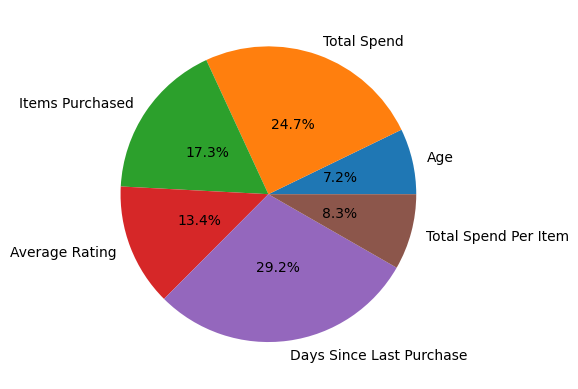

In [27]:
(pd.Series(feature_importances, index=feature_names).plot(kind='pie',pctdistance=0.5,autopct="%.1f%%"))

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Assuming df is your DataFrame
features = ['Gender', 'Age_group', 'Avg_rating_group', 'Days Since Last Purchase', 'Discount Applied', 'Items Purchased', 'Total Spend', 'Membership Type', 'City']
X = df[features]
y = df['Satisfaction Level']

# Define categorical and numerical features
categorical_features = ['Gender', 'Age_group', 'Avg_rating_group', 'Membership Type', 'City', 'Discount Applied']
numerical_features = ['Days Since Last Purchase', 'Items Purchased', 'Total Spend']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and the Logistic Regression model
model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs'))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_2.fit(X_train, y_train)

# Get coefficients for each class
coef_columns = model_2.named_steps['preprocessor'].get_feature_names_out(features)
coefficients = pd.DataFrame(model_2.named_steps['classifier'].coef_, index=model.classes_, columns=coef_columns)

# Print coefficients
print("Coefficients:")
print(coefficients)


Coefficients:
             num__Days Since Last Purchase  num__Items Purchased  \
Neutral                           0.002866             -0.773341   
Satisfied                        -0.329651              0.887653   
Unsatisfied                       0.326785             -0.114312   

             num__Total Spend  cat__Gender_Female  cat__Gender_Male  \
Neutral              0.011849            0.149281          0.258631   
Satisfied           -0.000866            0.296623         -0.549870   
Unsatisfied         -0.010983           -0.445905          0.291240   

             cat__Age_group_25-29  cat__Age_group_30-34  cat__Age_group_35-39  \
Neutral                  0.004310             -0.766014              1.292116   
Satisfied               -0.024314              0.503154             -0.727955   
Unsatisfied              0.020004              0.262860             -0.564162   

             cat__Age_group_40-44  cat__Avg_rating_group_3.0-3.4  ...  \
Neutral                 -0.122

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Average Rating

In [30]:
# Average Rating
from sklearn.linear_model import LinearRegression


# Assuming df is your DataFrame
features = ['Gender', 'Age', 'Days Since Last Purchase', 'Discount Applied', 'Items Purchased', 'Total Spend', 'Membership Type','Total Spend Per Item']
target_variable = 'Average Rating'

# Select features and target variable
X = df[features]
y = df[target_variable]

# Define categorical and numerical features
categorical_features = ['Gender', 'Membership Type', 'Discount Applied']
numerical_features = ['Age', 'Days Since Last Purchase', 'Items Purchased', 'Total Spend','Total Spend Per Item']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a linear regression model pipeline
model_2 = LinearRegression()

# Create the full pipeline including preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model_2)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model if needed (e.g., calculate metrics, plot results)

# Print the coefficients (linear regression coefficients)
coefficients = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

# Display coefficients and intercept
print("Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print("Intercept:", intercept)


Coefficients:
Gender: 0.01651487832066921
Age: 0.0021123551746977227
Days Since Last Purchase: 0.26665844498205216
Discount Applied: -0.002299922492893111
Items Purchased: 0.04147009433291771
Total Spend: 0.07266364736314032
Membership Type: -0.0726636473631403
Total Spend Per Item: -0.2604464394109489
Intercept: -0.7160781765052695


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# ... (previous code for model training)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.0986582903468619
Mean Squared Error: 0.01551344575241192
Root Mean Squared Error: 0.12455298371541293
R-squared: 0.9535820545499509


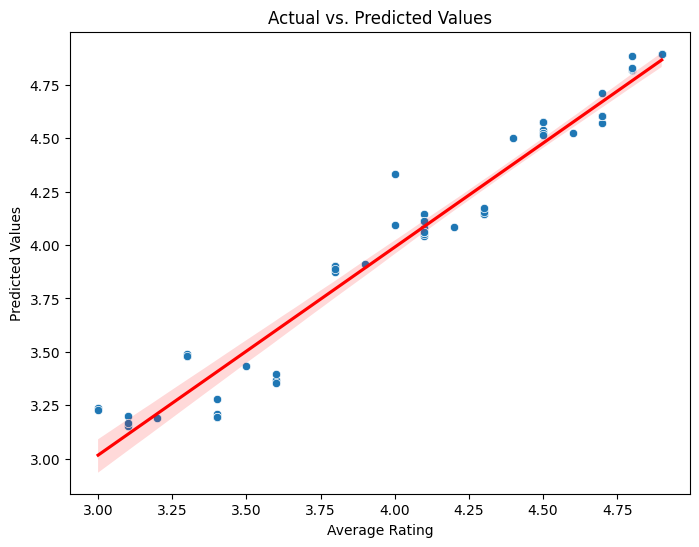

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.show()

# Total Spend

In [33]:
# Average Rating
from sklearn.linear_model import LinearRegression


# Assuming df is your DataFrame
numerical_features = ['Age', 'Days Since Last Purchase', 'Items Purchased', 'Total Spend Per Item']
target_variable = 'Total Spend'

# Select features and target variable
X = df[numerical_features]
y = df[target_variable]

# Create a linear regression model pipeline
model_2 = LinearRegression()

# Fit the model
model_2.fit(X, y)


# Print the coefficients (linear regression coefficients)
coefficients = model_2.coef_
intercept = model_2.intercept_

# Display coefficients and intercept
print("Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print("Intercept:", intercept)

Coefficients:
Gender: 3.1074873661180775
Age: -0.3166932897540491
Days Since Last Purchase: 70.77243855262276
Discount Applied: 11.756112187959761
Intercept: -909.2667582925451


In [34]:
# Assuming df is your DataFrame
features = ['Age', 'Days Since Last Purchase', 'Items Purchased','Average Rating', 'Total Spend Per Item']
target_variable = 'Total Spend'

# Select features and target variable
X = df[features]
y = df[target_variable]

# Create a column transformer for preprocessing (remove the 'cat' transformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features)
    ])

# Create a linear regression model pipeline
model_2 = LinearRegression()

# Create the full pipeline including preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model_2)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model if needed (e.g., calculate metrics, plot results)

# Print the coefficients (linear regression coefficients)
coefficients = pipeline.named_steps['regressor'].coef_
intercept = pipeline.named_steps['regressor'].intercept_

# Display coefficients and intercept
print("Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

print("Intercept:", intercept)

Coefficients:
Age: 2.756131532802667
Days Since Last Purchase: 0.013323878908721554
Items Purchased: 75.99749035085851
Average Rating: -53.686828857622665
Total Spend Per Item: 13.091123258152997
Intercept: -843.5244778920325


In [35]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.745927685775117
Mean Squared Error: 176.50699797578662
Root Mean Squared Error: 13.285593625268938
R-squared: 0.9987679417187417


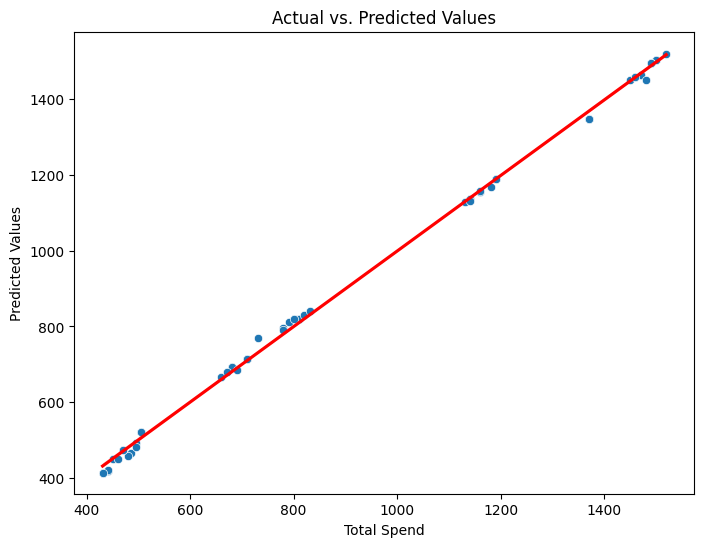

In [36]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')

plt.show()

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a linear regression model pipeline with StandardScaler for numerical features
model = make_pipeline(StandardScaler(), LinearRegression())

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number based on your preference

# Create a k-fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Display the cross-validation results
print("Cross-Validation Results:")
print("Mean RMSE:", np.sqrt(-cv_results.mean()))
print("Standard Deviation:", np.sqrt(cv_results.std()))

Cross-Validation Results:
Mean RMSE: 13.133230311003624
Standard Deviation: 3.7167990181835178


# EDA

## Distribution Visualization

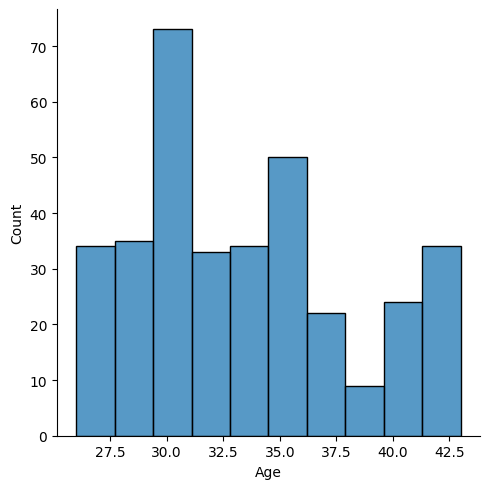

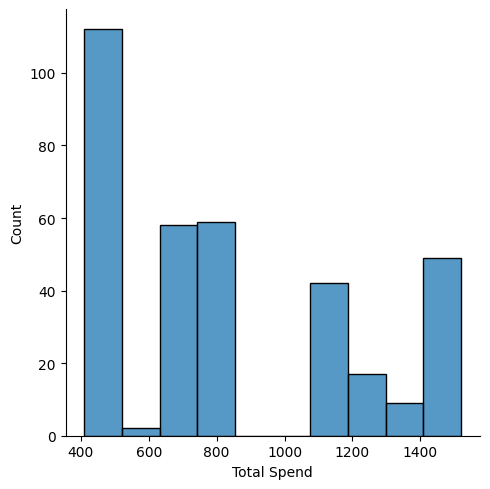

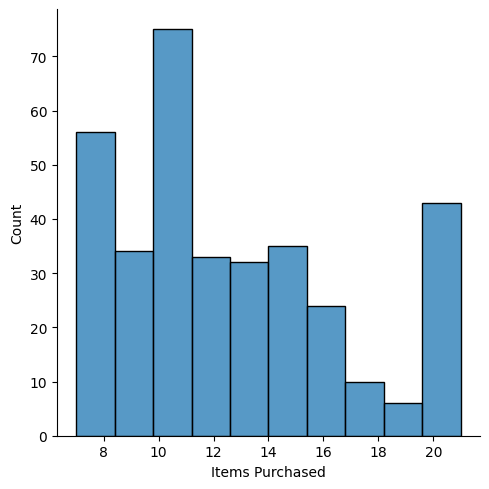

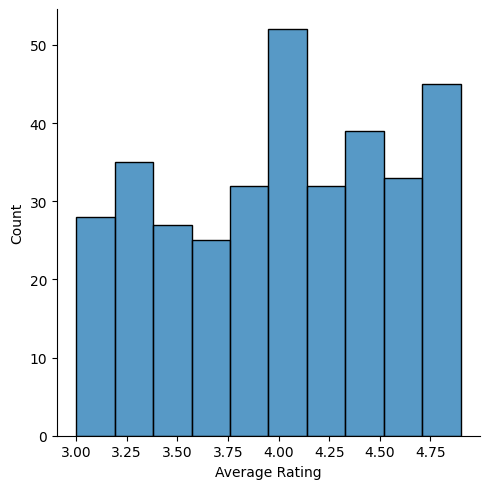

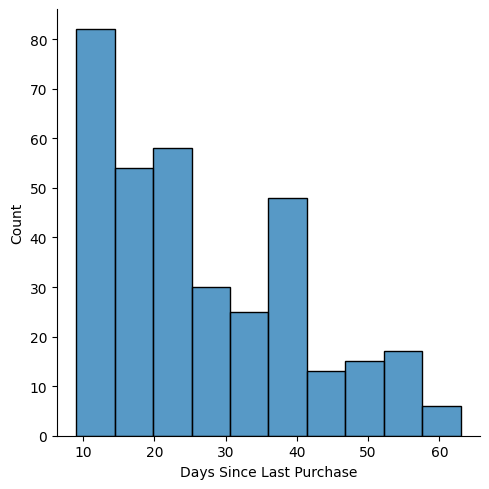

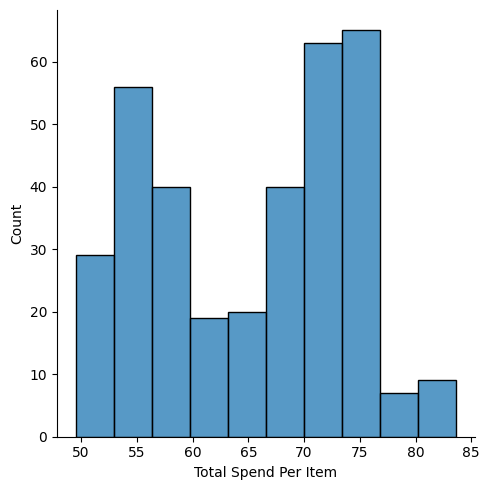

In [38]:
numerical_features= ['Age','Total Spend',	'Items Purchased','Average Rating','Days Since Last Purchase','Total Spend Per Item']
for x in numerical_features:
  sns.displot(df, x=x)

<Axes: xlabel='Total Spend', ylabel='Density'>

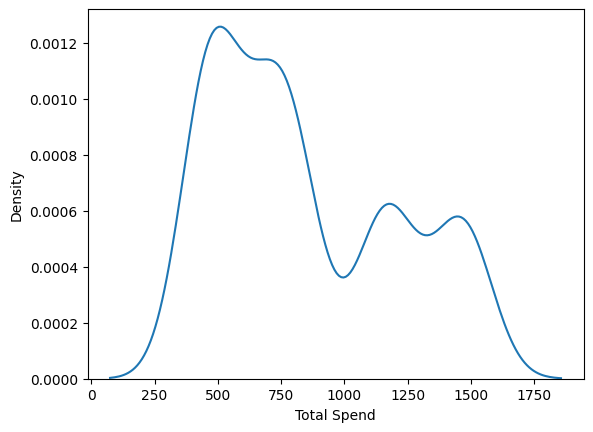

In [39]:
sns.kdeplot(df, x="Total Spend")

## Categorical Variable Analysis

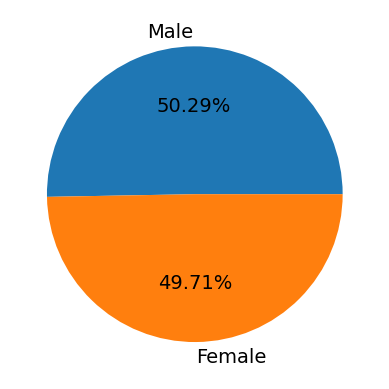

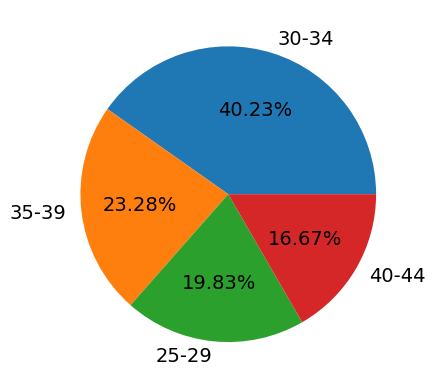

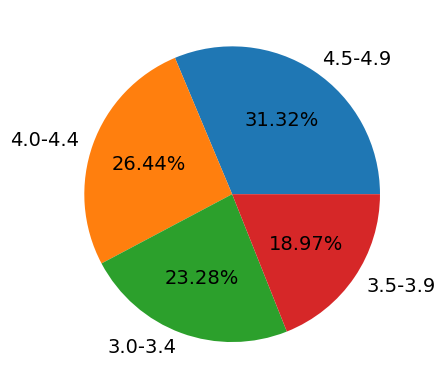

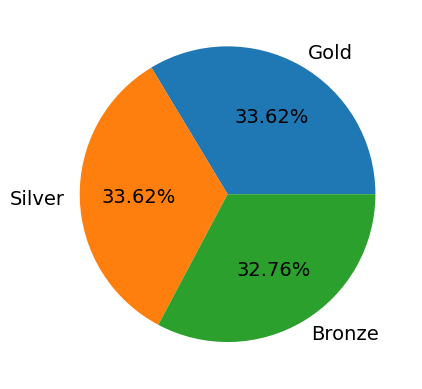

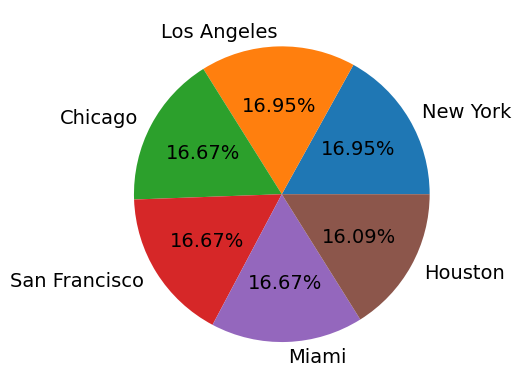

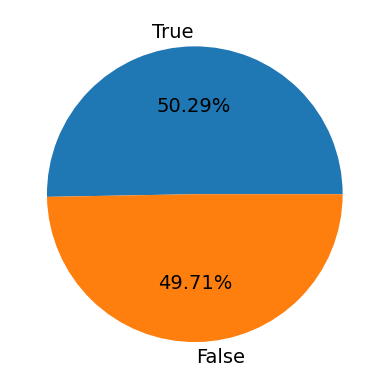

In [40]:
categorical_features = ['Gender', 'Age_group', 'Avg_rating_group', 'Membership Type', 'City', 'Discount Applied']
#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

#create pie chart
for x in categorical_features:
  df[x].value_counts().plot.pie(autopct='%.2f%%',label="",textprops={'fontsize': 14})
  plt.show()

## Correlation Analysis

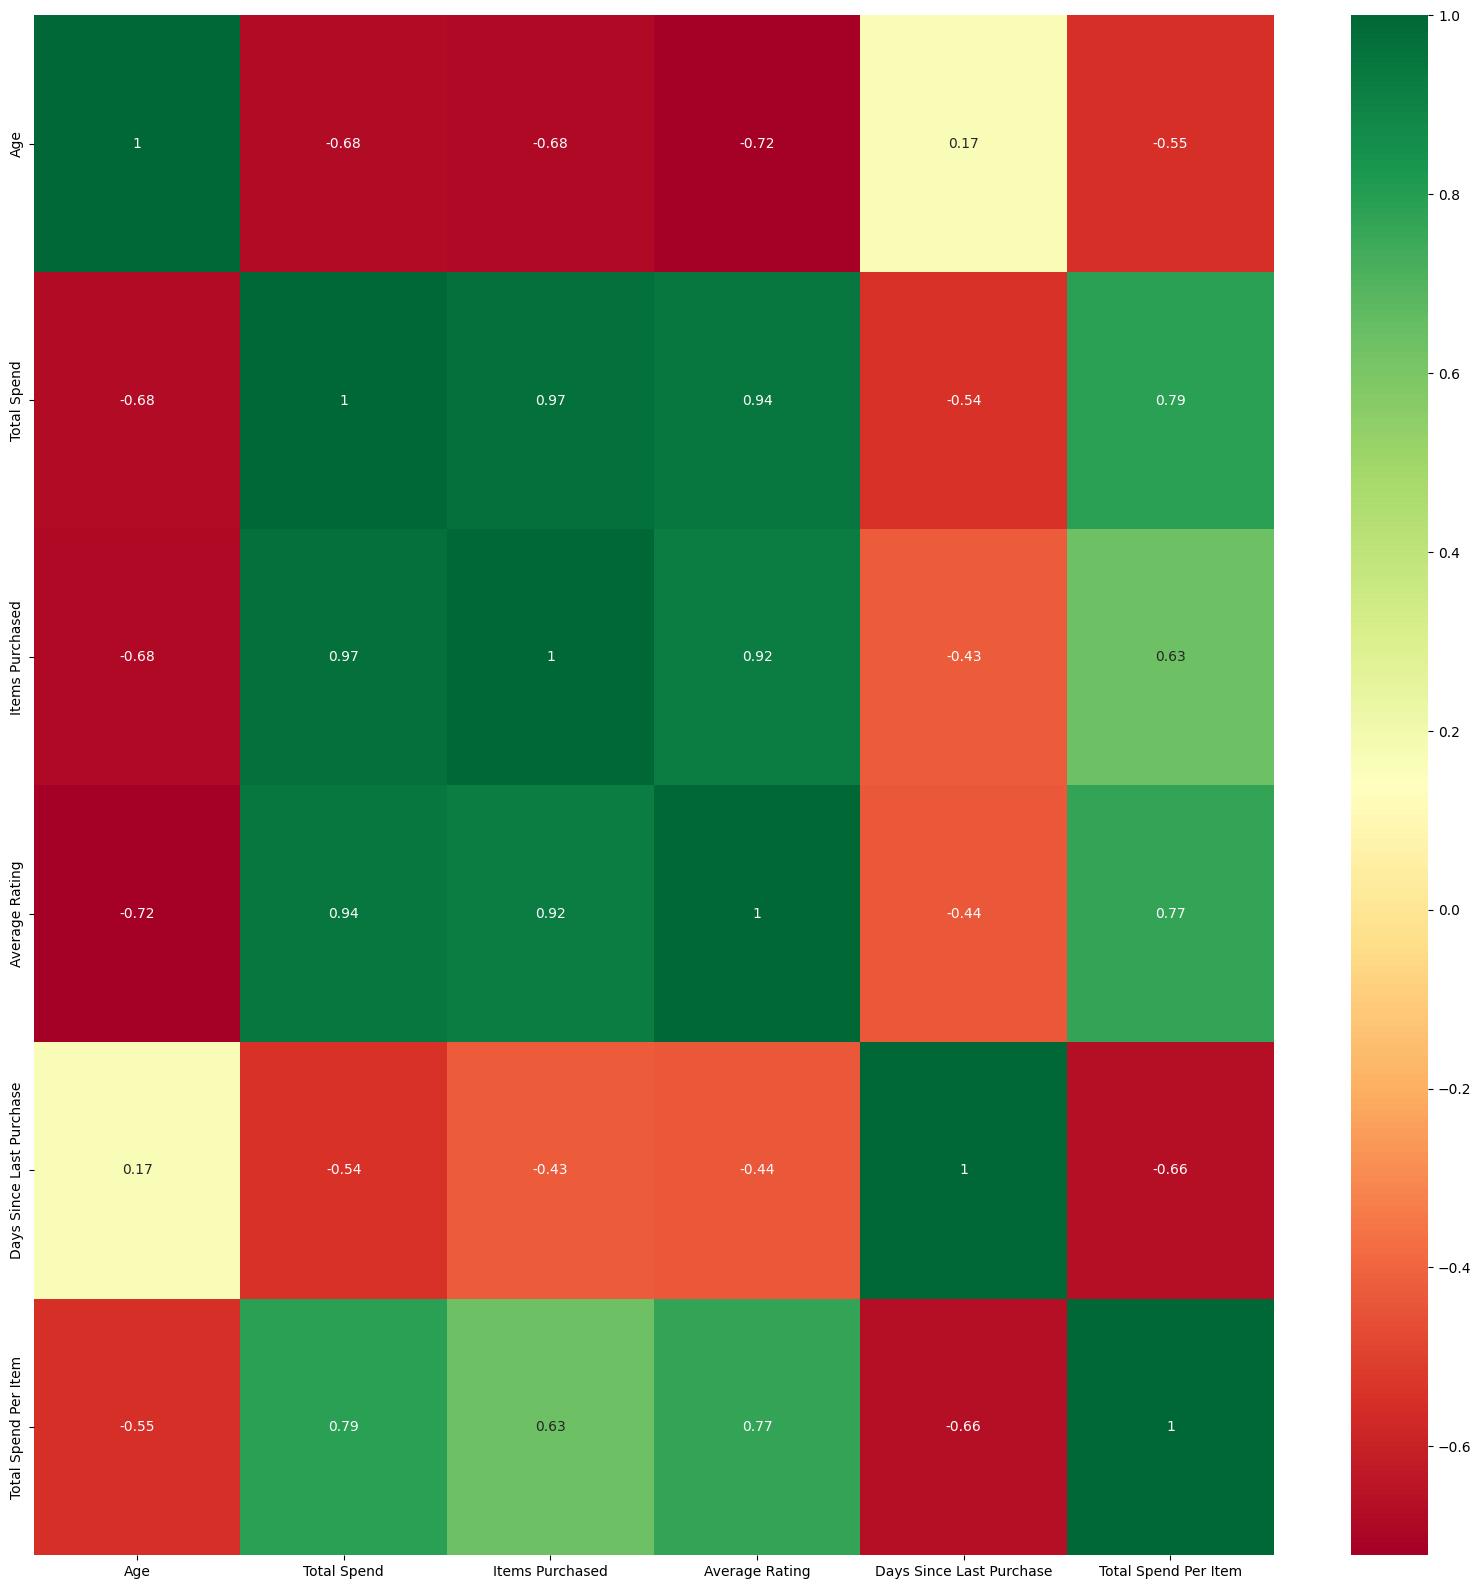

In [41]:
corrmat = df_numeric.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_numeric[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Pairplot

In [42]:
df[numerical_features]

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Total Spend Per Item
0,29,1120.20,14,4.6,25,80.014286
1,34,780.50,11,4.1,18,70.954545
2,43,510.75,9,3.4,42,56.750000
3,30,1480.30,19,4.7,12,77.910526
4,27,720.40,13,4.0,55,55.415385
...,...,...,...,...,...,...
345,32,660.30,10,3.8,42,66.030000
346,36,470.50,8,3.0,27,58.812500
347,30,1190.80,16,4.5,28,74.425000
348,34,780.20,11,4.2,21,70.927273


In [43]:
df_pair=df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase', 'Total Spend Per Item', 'Age_group']]

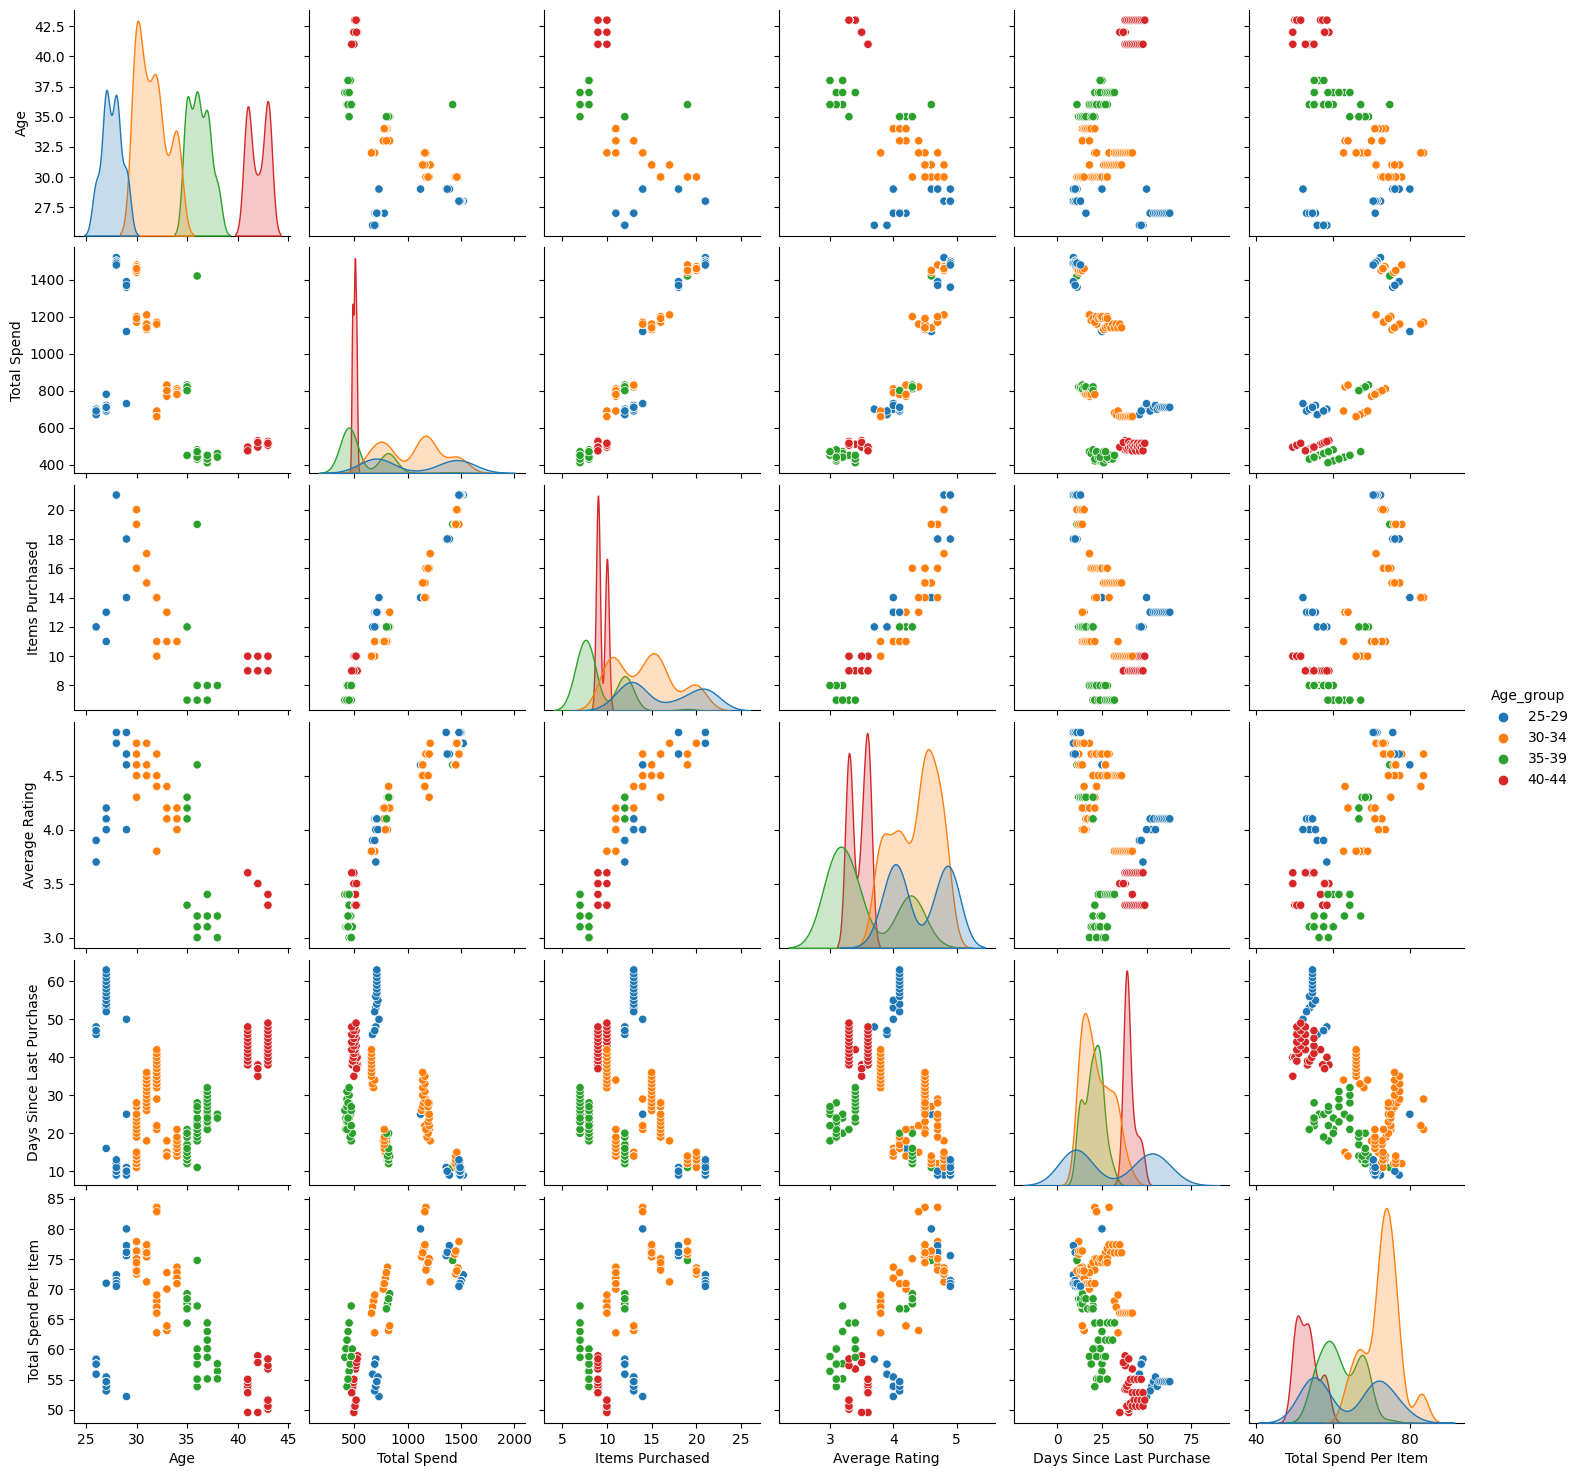

In [44]:
sns.pairplot(df_pair,hue='Age_group')

## BoxPlot

<Axes: xlabel='Total Spend', ylabel='Satisfaction Level'>

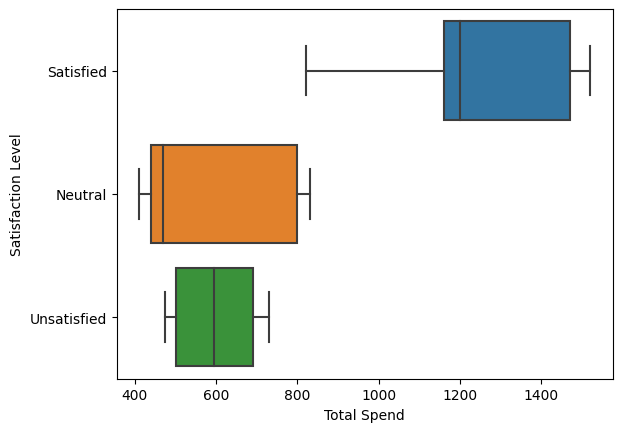

In [45]:
sns.boxplot(data= df, x= 'Total Spend', y= 'Satisfaction Level')

<Axes: xlabel='Total Spend Per Item', ylabel='Satisfaction Level'>

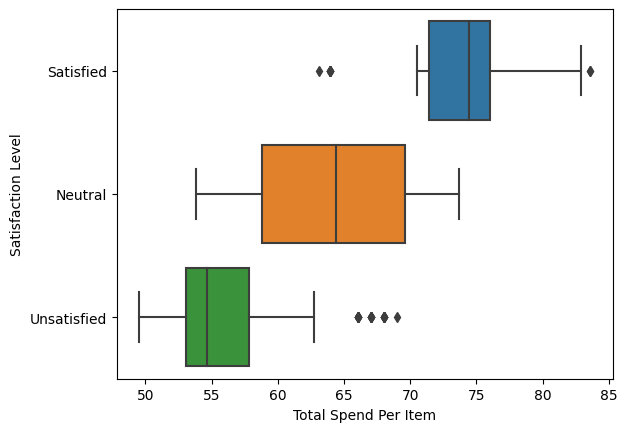

In [46]:
sns.boxplot(data= df, x= 'Total Spend Per Item', y= 'Satisfaction Level')

## ScatterPlot

<Axes: xlabel='Total Spend Per Item', ylabel='Average Rating'>

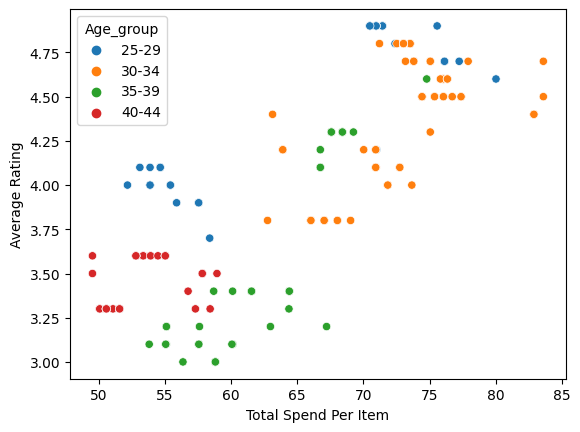

In [47]:
sns.scatterplot(x = 'Total Spend Per Item', y = 'Average Rating', hue = 'Age_group', data = df)

<Axes: xlabel='Items Purchased', ylabel='Total Spend'>

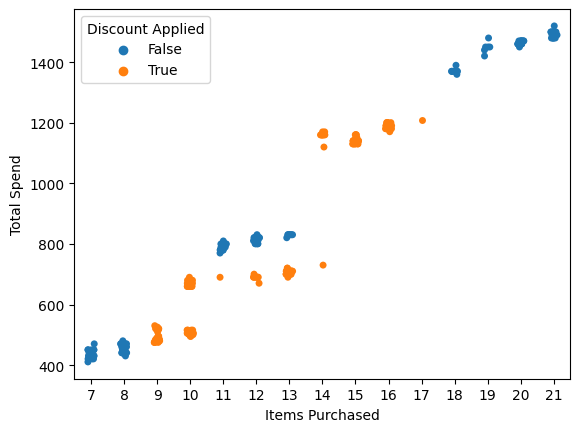

In [48]:
sns.stripplot(x = 'Items Purchased', y = 'Total Spend', hue = 'Discount Applied', data = df)

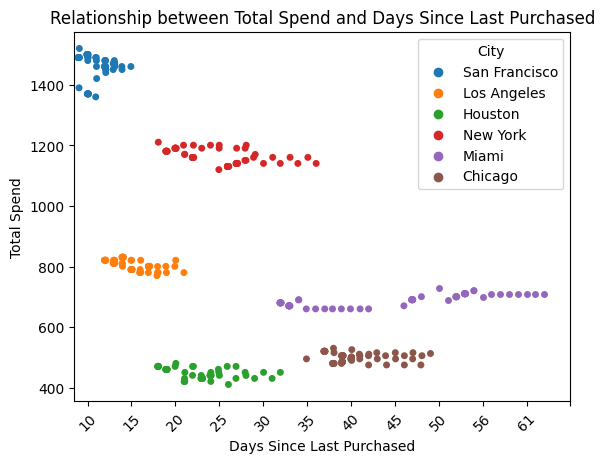

In [49]:
sns.stripplot(x = 'Days Since Last Purchase', y = 'Total Spend', hue = 'City', data = df)
plt.title('Relationship between Total Spend and Days Since Last Purchased')
plt.xlabel('Days Since Last Purchased')
plt.ylabel('Total Spend')
plt.legend(title='City', loc='upper right')
plt.xticks(ticks= range(1,60,5), rotation=45)
# Show the plot
plt.show()

<Axes: xlabel='Items Purchased', ylabel='Average Rating'>

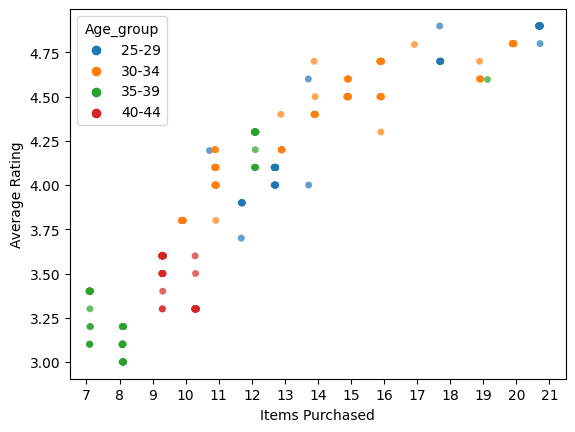

In [50]:
sns.stripplot(x = 'Items Purchased', y = 'Average Rating', hue = 'Age_group', data = df,alpha=0.7, jitter=True, dodge=True)

<Axes: xlabel='Items Purchased', ylabel='Average Rating'>

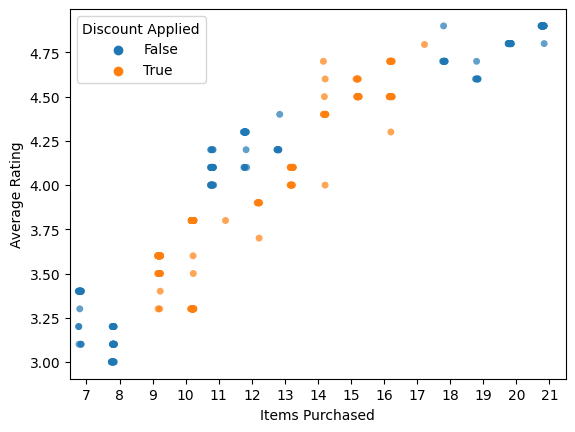

In [51]:
sns.stripplot(x = 'Items Purchased', y = 'Average Rating', hue = 'Discount Applied', data = df, alpha=0.7, jitter=True, dodge=True)

<Axes: xlabel='Total Spend', ylabel='Average Rating'>

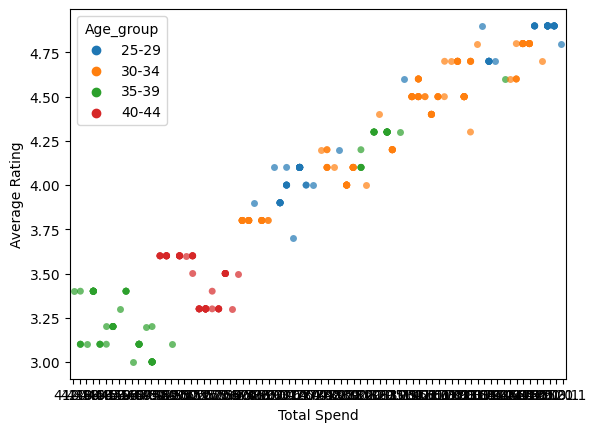

In [52]:
sns.stripplot(x = 'Total Spend', y = 'Average Rating', hue = 'Age_group', data = df,alpha=0.7, jitter=True, dodge=True)

<Axes: xlabel='Total Spend', ylabel='Average Rating'>

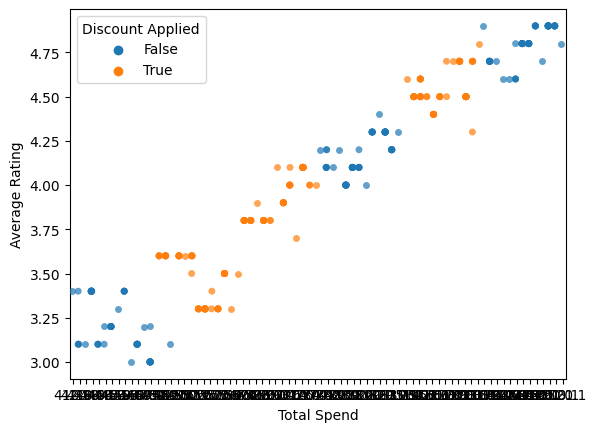

In [53]:
sns.stripplot(x = 'Total Spend', y = 'Average Rating', hue = 'Discount Applied', data = df,alpha=0.7, jitter=True, dodge=True)

<Axes: xlabel='Satisfaction Level', ylabel='Average Rating'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


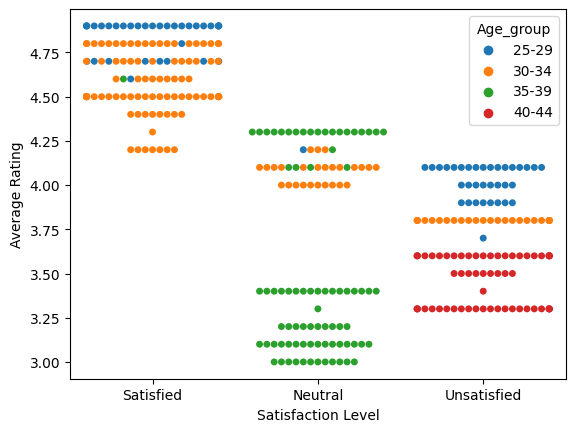

In [54]:
sns.swarmplot(x= 'Satisfaction Level', y='Average Rating', data=df, hue='Age_group')

<Axes: xlabel='Satisfaction Level', ylabel='Average Rating'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


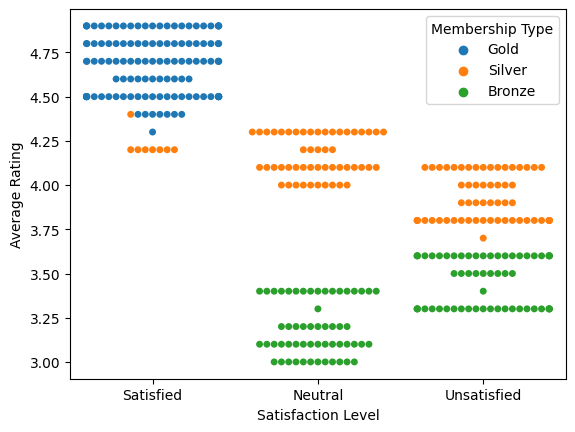

In [55]:
sns.swarmplot(x= 'Satisfaction Level', y='Average Rating',data=df,hue='Membership Type')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Satisfaction Level', ylabel='Total Spend'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


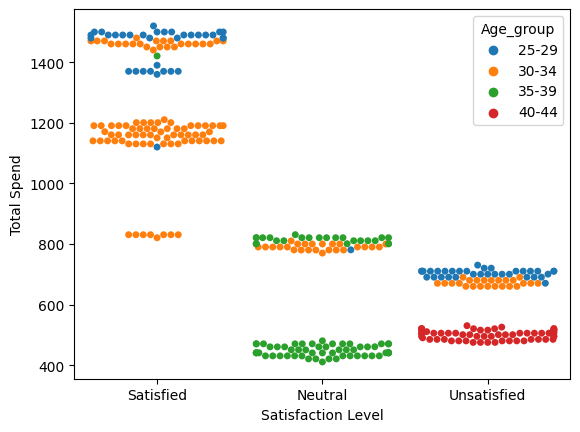

In [56]:
sns.swarmplot(x= 'Satisfaction Level', y='Total Spend',data=df,hue='Age_group')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Satisfaction Level', ylabel='Total Spend'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


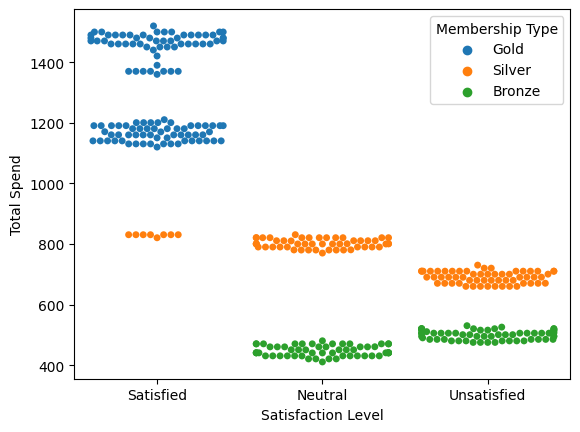

In [57]:
sns.swarmplot(x= 'Satisfaction Level', y='Total Spend',data=df,hue='Membership Type')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Satisfaction Level', ylabel='Total Spend'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


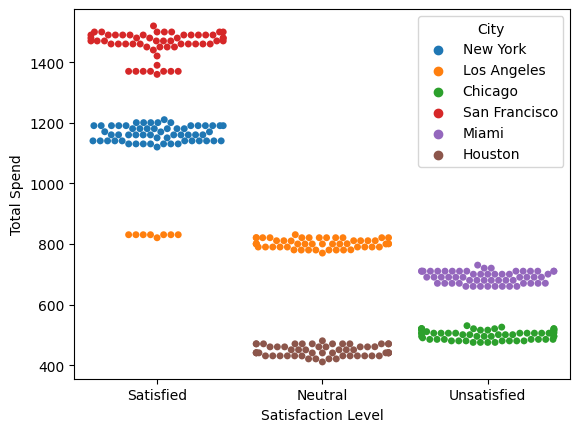

In [58]:
sns.swarmplot(x= 'Satisfaction Level', y='Total Spend',data=df,hue='City')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Satisfaction Level', ylabel='Total Spend'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


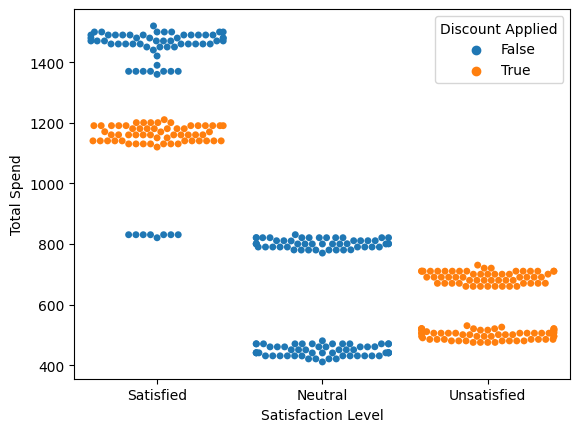

In [59]:
sns.swarmplot(x= 'Satisfaction Level', y='Total Spend',data=df,hue='Discount Applied')

<Axes: xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

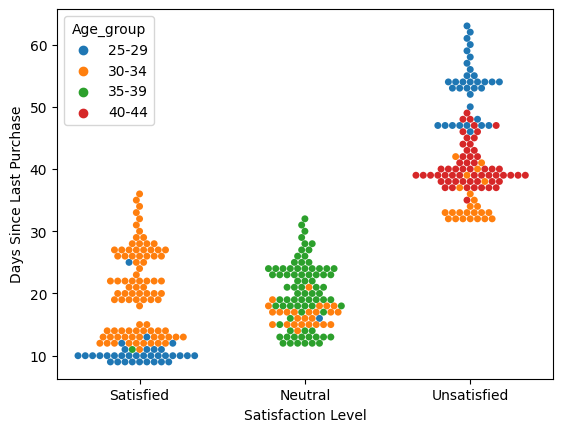

In [60]:
sns.swarmplot(x= 'Satisfaction Level', y='Days Since Last Purchase',data=df,hue='Age_group')

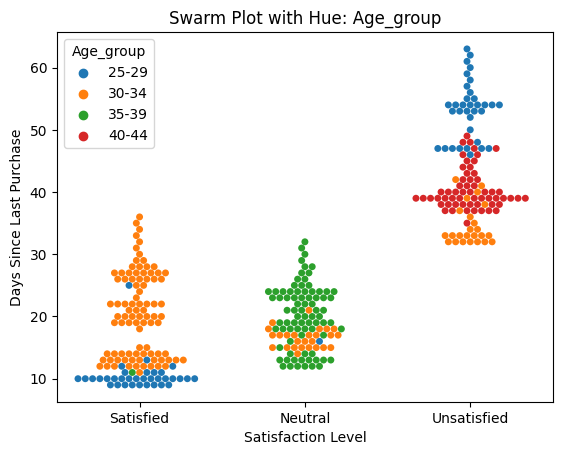

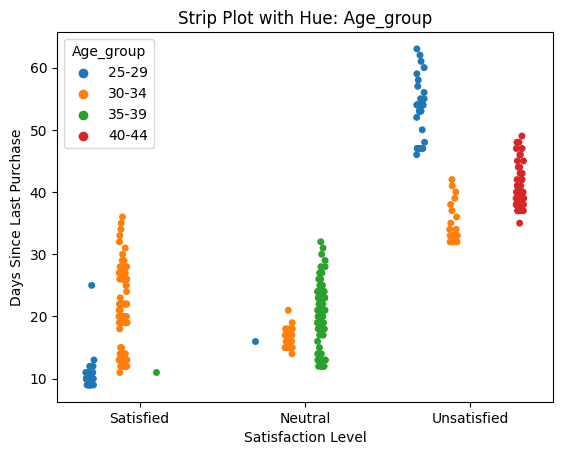

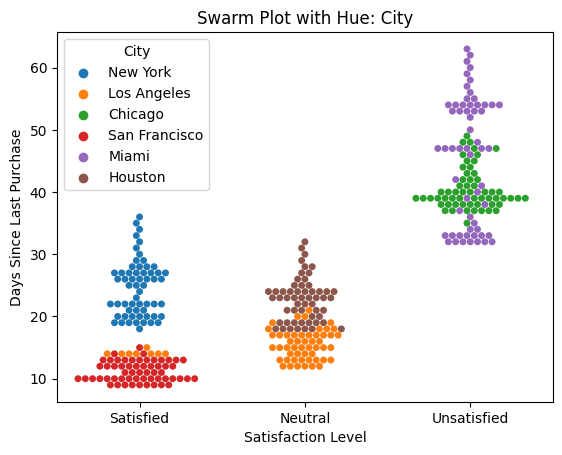

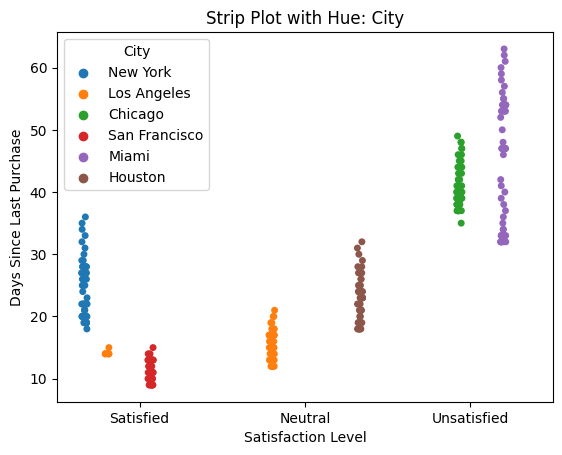

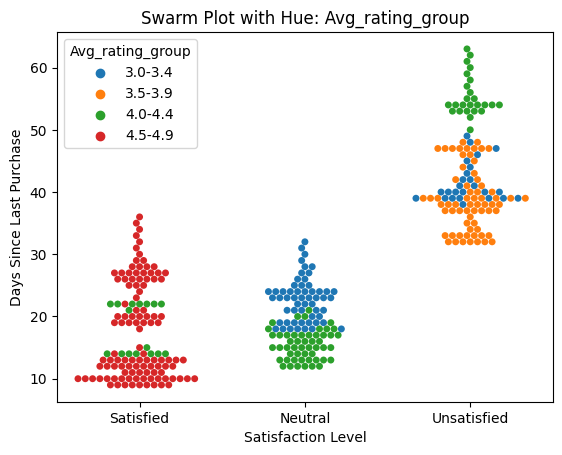

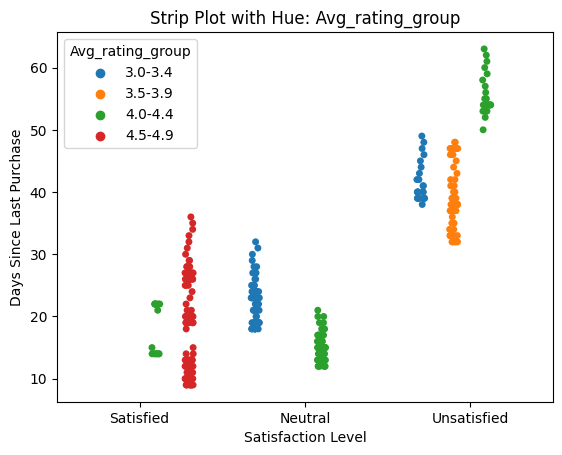

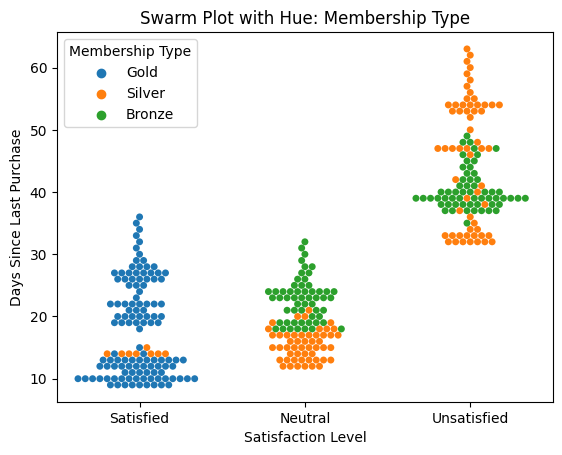

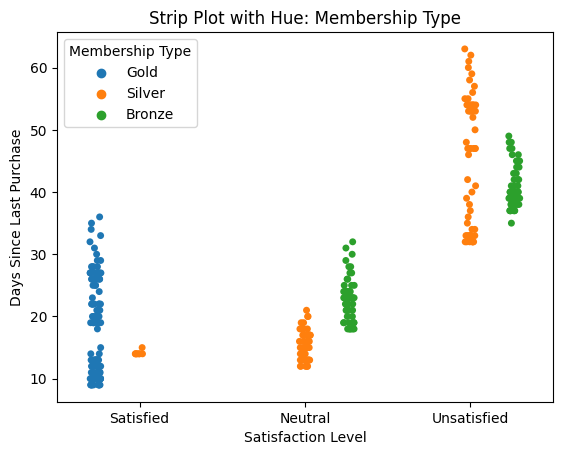

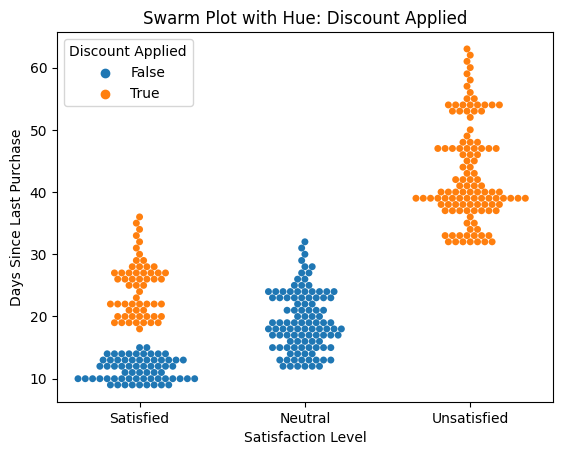

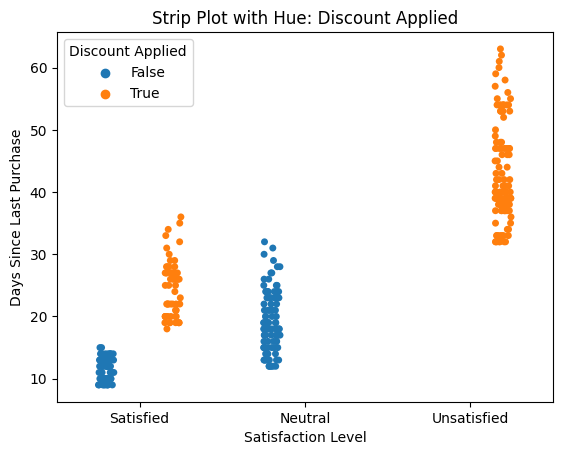

In [61]:
hue = ['Age_group', 'City', 'Avg_rating_group', 'Membership Type', 'Discount Applied']

for x in hue:
    sns.swarmplot(x='Satisfaction Level', y='Days Since Last Purchase', data=df, hue=x, size=5)
    plt.title(f'Swarm Plot with Hue: {x}')
    plt.show()
    sns.stripplot(x='Satisfaction Level', y='Days Since Last Purchase', data=df, hue=x, jitter=True, dodge=True)
    plt.title(f'Strip Plot with Hue: {x}')
    plt.show()

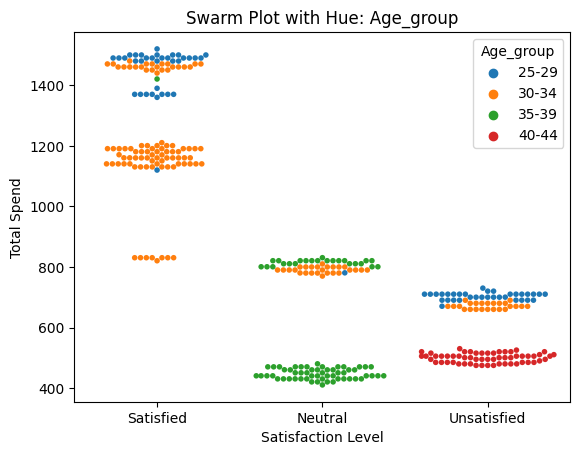

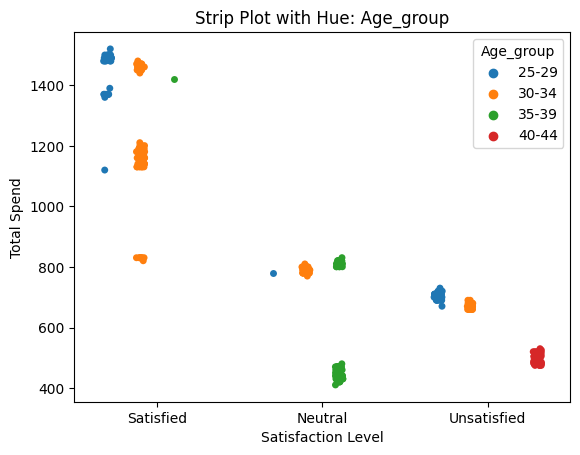

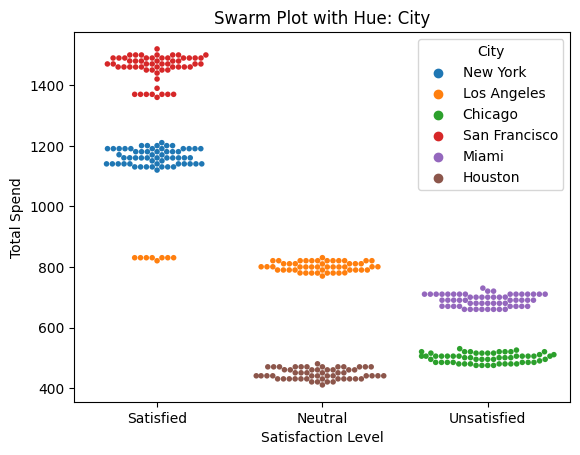

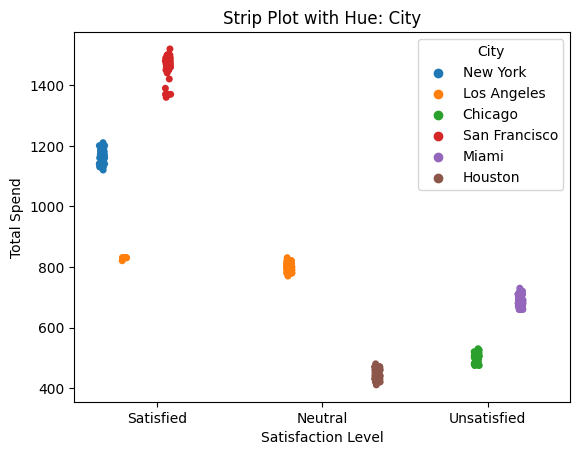

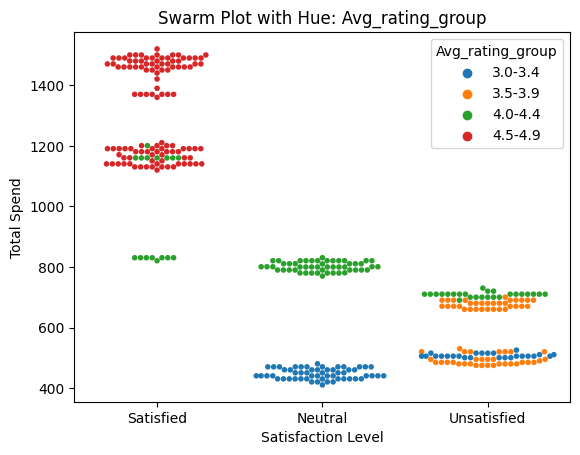

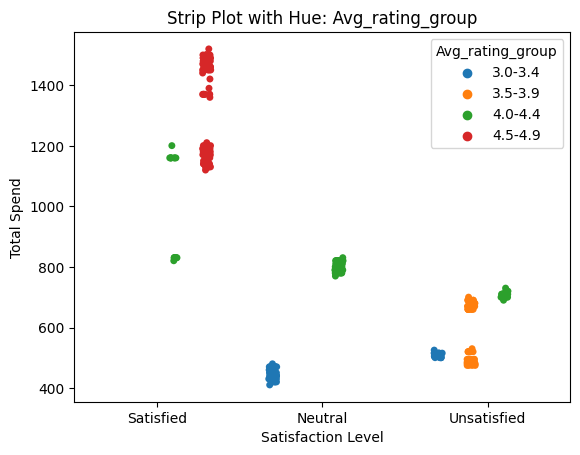

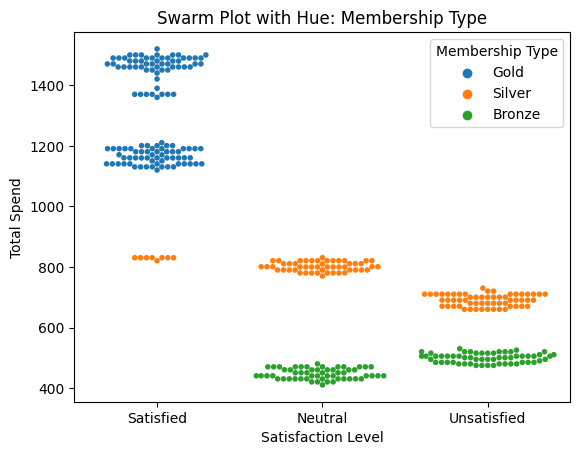

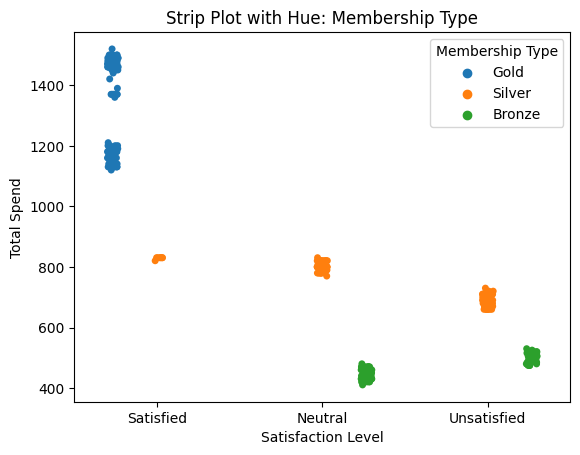

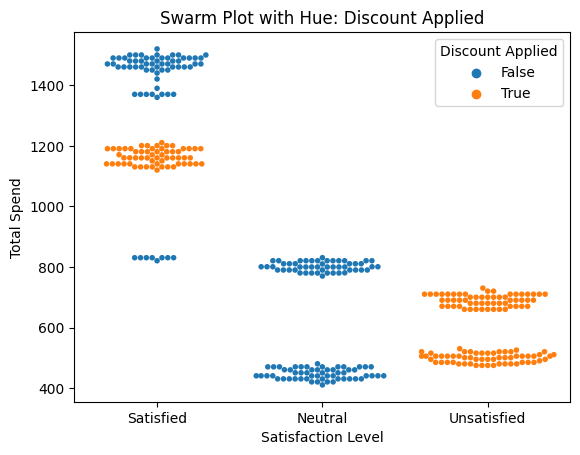

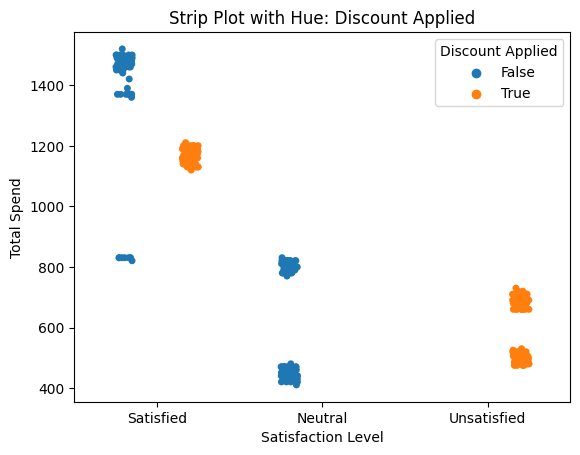

In [62]:
hue = ['Age_group', 'City', 'Avg_rating_group', 'Membership Type', 'Discount Applied']

for x in hue:
    sns.swarmplot(x='Satisfaction Level', y='Total Spend', data=df, hue=x, size=4)
    plt.title(f'Swarm Plot with Hue: {x}')
    plt.show()
    sns.stripplot(x='Satisfaction Level', y='Total Spend', data=df, hue=x, jitter=True, dodge=True)
    plt.title(f'Strip Plot with Hue: {x}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


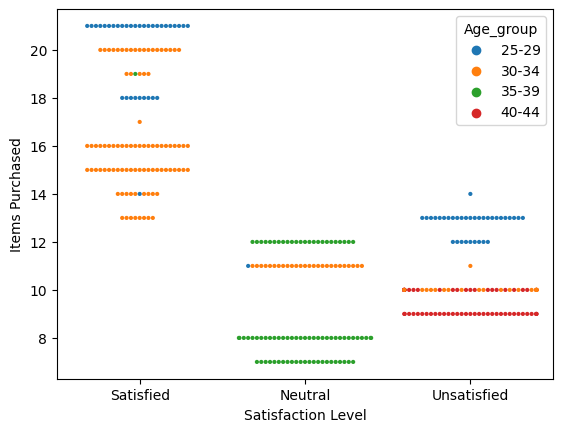

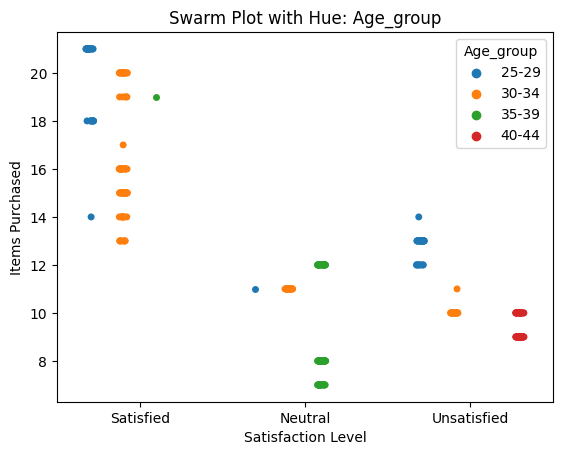

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


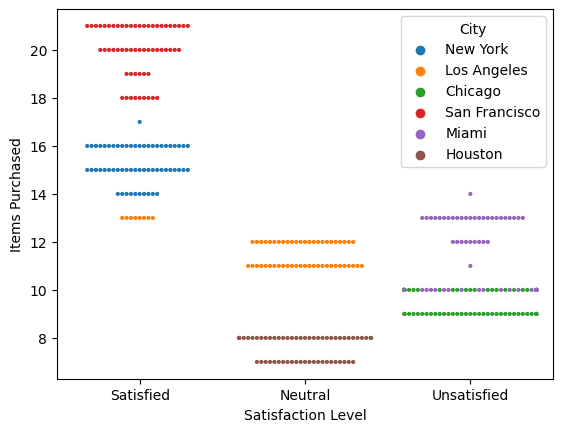

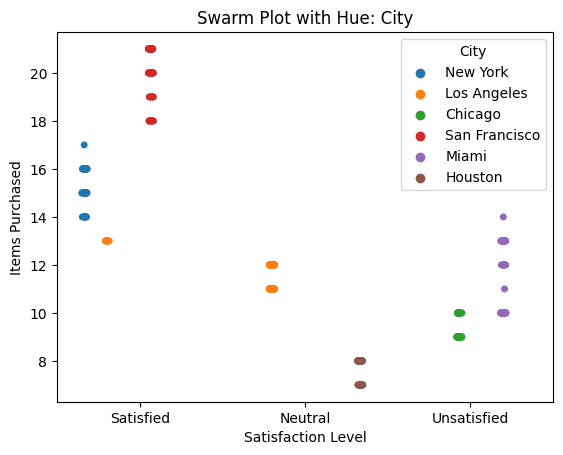

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


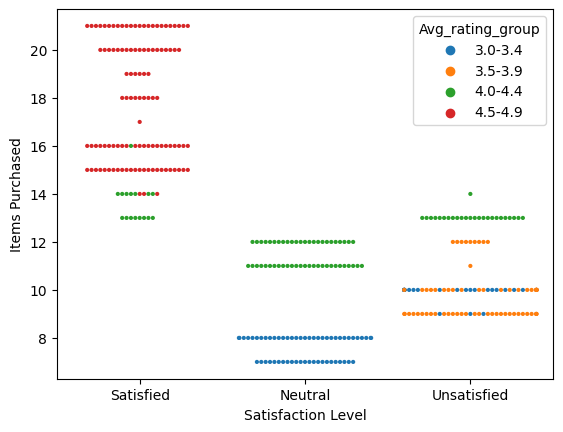

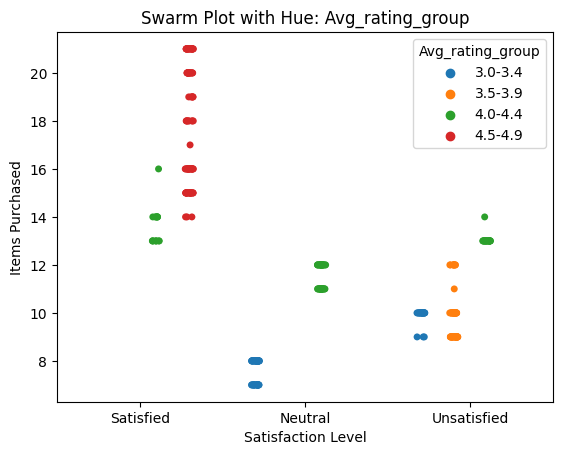

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


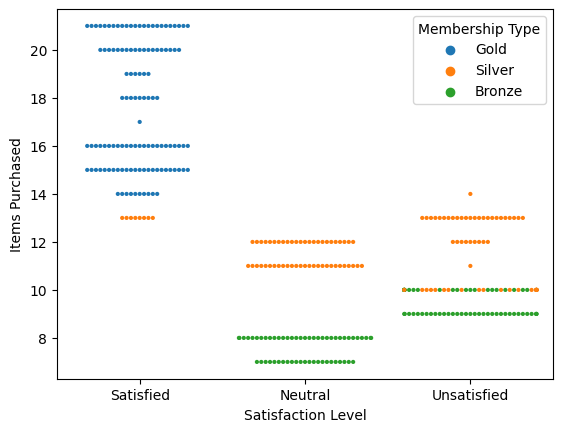

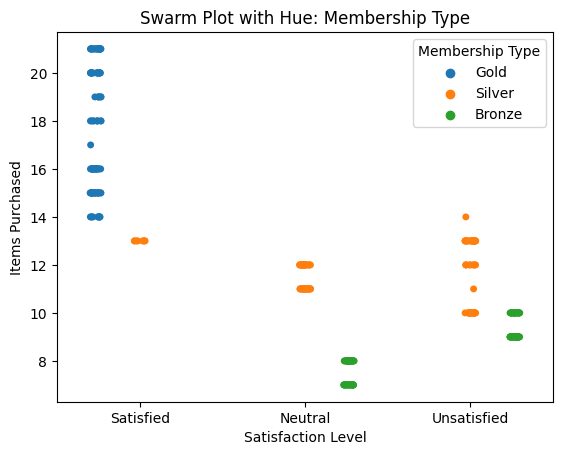

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


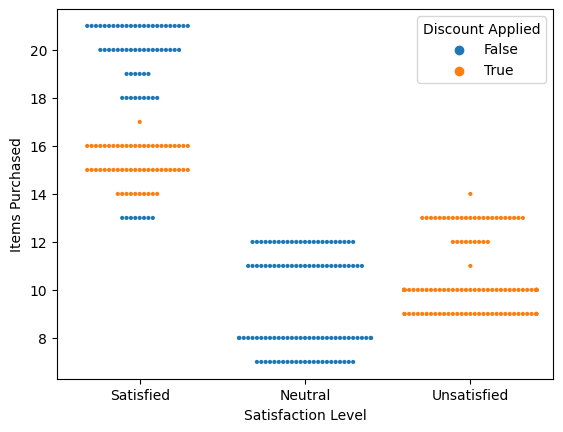

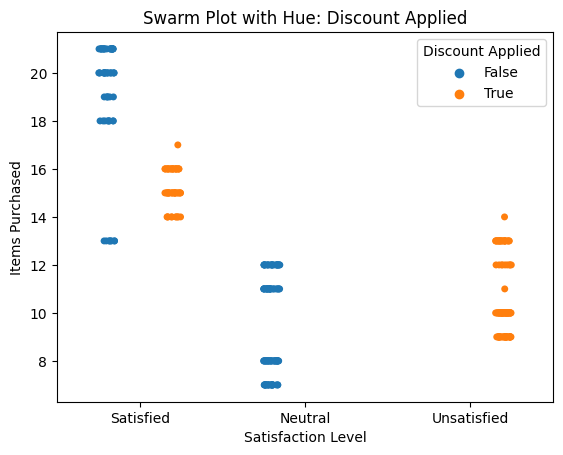

In [63]:
hue = ['Age_group', 'City', 'Avg_rating_group', 'Membership Type', 'Discount Applied']

for x in hue:
    sns.swarmplot(x='Satisfaction Level', y='Items Purchased', data=df, hue=x, size=3)
    plt.show()
    sns.stripplot(x='Satisfaction Level', y='Items Purchased', data=df, hue=x, jitter=True, dodge=True)
    plt.title(f'Swarm Plot with Hue: {x}')
    plt.show()

<Axes: xlabel='Satisfaction Level', ylabel='Items Purchased'>

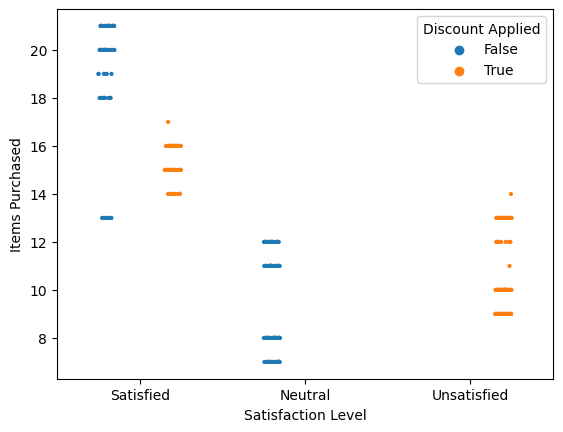

In [64]:
sns.stripplot(x='Satisfaction Level', y='Items Purchased', data=df, hue=x, jitter=True, dodge=True, size=3)

<Axes: xlabel='Days Since Last Purchase', ylabel='Total Spend'>

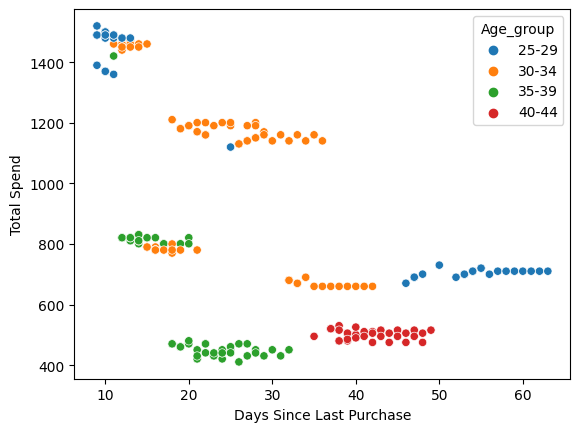

In [65]:
sns.scatterplot(x = 'Days Since Last Purchase' , y = 'Total Spend', hue='Age_group', data = df)

<Axes: xlabel='Days Since Last Purchase', ylabel='Age'>

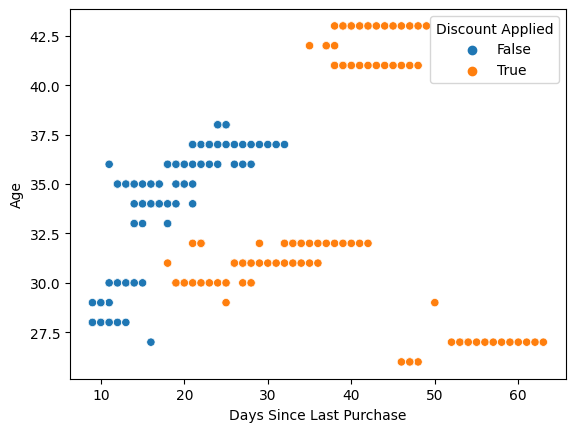

In [66]:
sns.scatterplot(x = 'Days Since Last Purchase' , y = 'Age', hue='Discount Applied', data = df)